### 🧠 Best Pitchers by Stadium (Grade A Velocity)

This notebook identifies the top-performing pitchers by stadium, based on the number of **Grade A pitches** thrown in each park during a given season.

A **Grade A pitch** is defined as any pitch that averages **≥2 mph above league average** for its pitch type — indicating elite velocity.

#### 🧾 Method:
- Merged pitch-by-pitch Statcast data with seasonal velocity grades
- Filtered to **Grade A pitches only**
- Grouped by `season`, `stadium`, and `player_name`
- Counted the total number of high-velocity pitch events per pitcher

#### 📈 Output:
A ranked leaderboard of pitchers per stadium per season, such as:

| Stadium | Season | Top Pitchers              | A-Grade Count |
|---------|--------|----------------------------|----------------|
| ATL     | 2022   | Spencer Strider           | 870            |
| ATL     | 2022   | Kyle Wright               | 854            |
| ATL     | 2022   | Charlie Morton            | 588            |

This data can be used to evaluate which teams feature elite arms at home, and which pitchers are performing best by ballpark.


In [1]:
# 📦 Imports
import pandas as pd
import glob

# 📁 Load raw Statcast data
files = sorted(glob.glob("../data/raw/statcast_*.csv"))
dfs = [pd.read_csv(file, low_memory=False) for file in files]
df_raw = pd.concat(dfs, ignore_index=True)

# ✅ Extract season, stadium, pitcher name
df_raw['season'] = pd.to_datetime(df_raw['game_date']).dt.year
df_raw['stadium'] = df_raw['home_team']
df_raw = df_raw[['season', 'pitcher', 'player_name', 'stadium', 'pitch_type', 'game_date']]

# 📁 Load velocity grades with season and pitch type
grades = pd.read_csv("../data/processed/pitcher_velocity_grades.csv")

# 🔗 Merge grades with player and stadium info
df = grades.merge(df_raw, on=['season', 'pitcher', 'pitch_type'], how='left')
df = df[df['velocity_grade'] == 'A']  # Filter to Grade A only
df = df.dropna(subset=['player_name', 'stadium'])  # Clean join

# 📊 Count A-grade pitch types per pitcher per stadium per season
top_pitchers = (
    df.groupby(['season', 'stadium', 'player_name', 'pitcher'])
    .size()
    .reset_index(name='grade_a_count')
    .sort_values(['season', 'stadium', 'grade_a_count'], ascending=[True, True, False])
)

# 💾 Save
top_pitchers.to_csv("../data/processed/top_pitchers_by_stadium.csv", index=False)
print("✅ Saved to ../data/processed/top_pitchers_by_stadium.csv")

# 🔍 Preview
top_pitchers.head(10)


✅ Saved to ../data/processed/top_pitchers_by_stadium.csv


,season,stadium,player_name,pitcher,grade_a_count
108,2022,ATL,"Strider, Spencer",675911,870
125,2022,ATL,"Wright, Kyle",657140,854
75,2022,ATL,"Morton, Charlie",450203,588
5,2022,ATL,"Anderson, Ian",666120,505
71,2022,ATL,"Minter, A.J.",621345,372
55,2022,ATL,"Jansen, Kenley",445276,348
38,2022,ATL,"Fried, Max",608331,319
2,2022,ATL,"Alcantara, Sandy",645261,203
127,2022,ATL,"deGrom, Jacob",594798,181
121,2022,ATL,"Wheeler, Zack",554430,151


C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


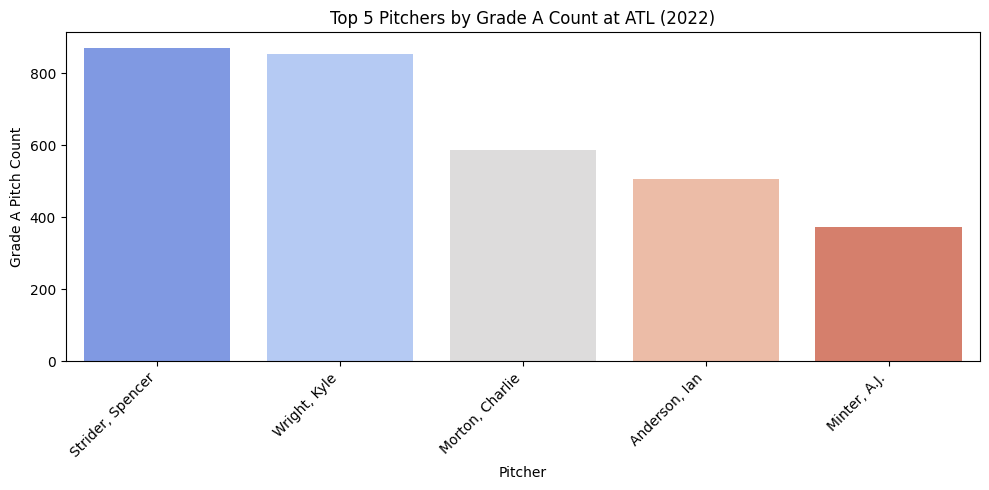

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


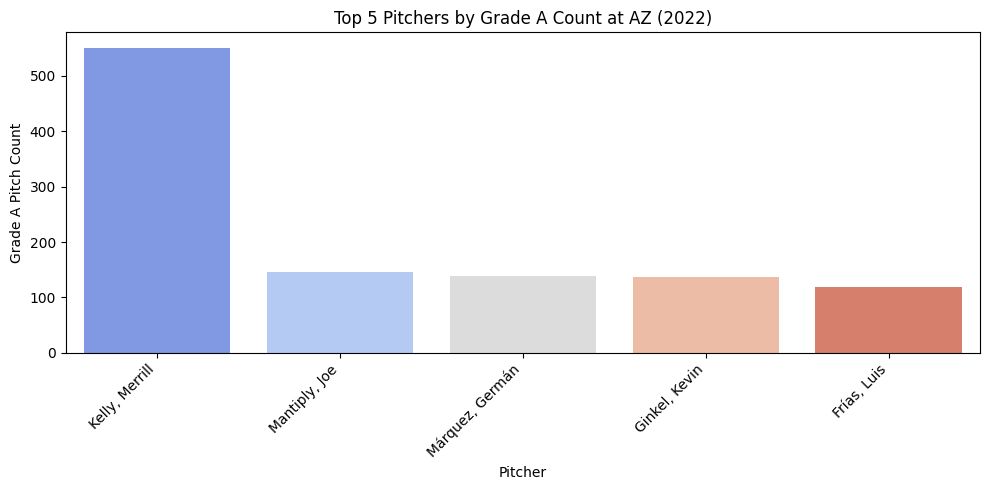

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


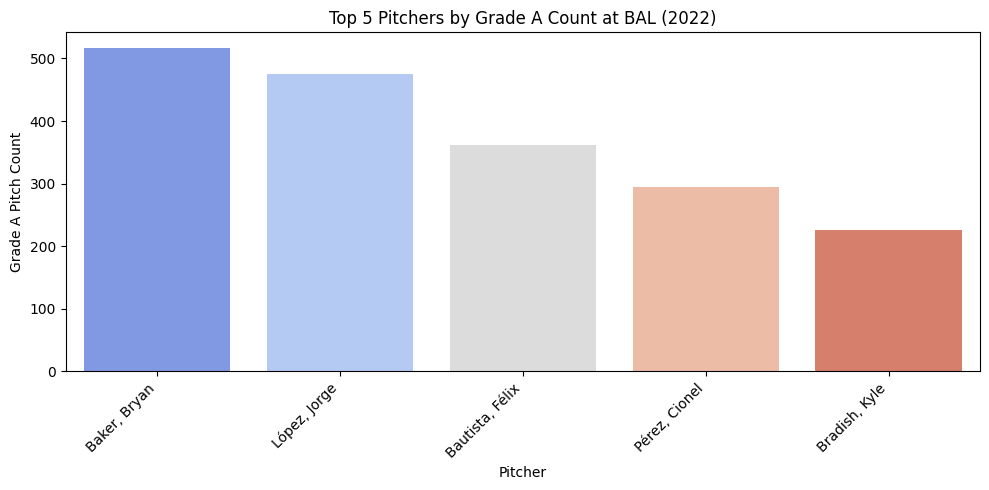

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


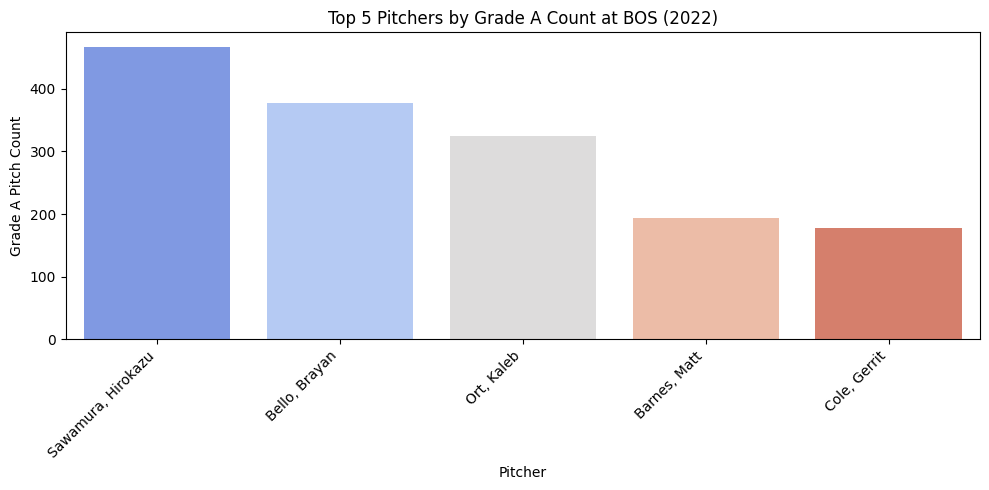

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


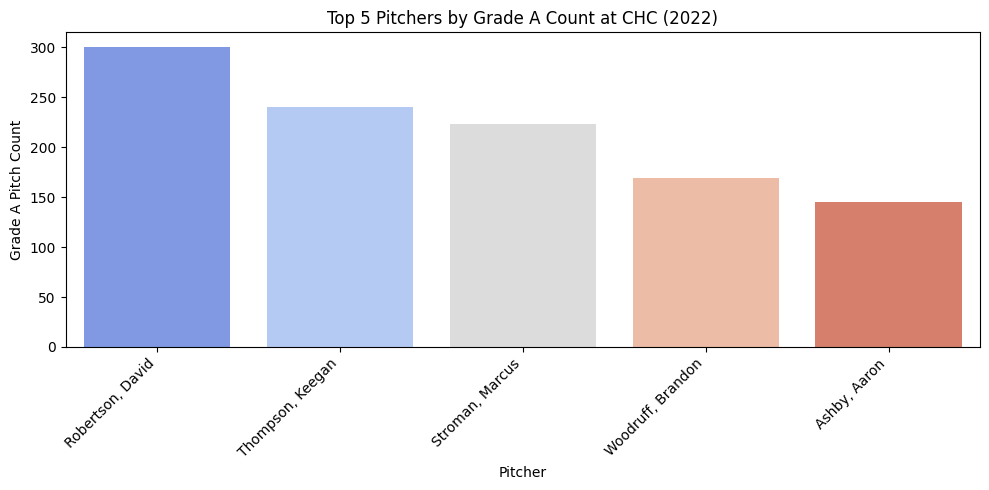

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


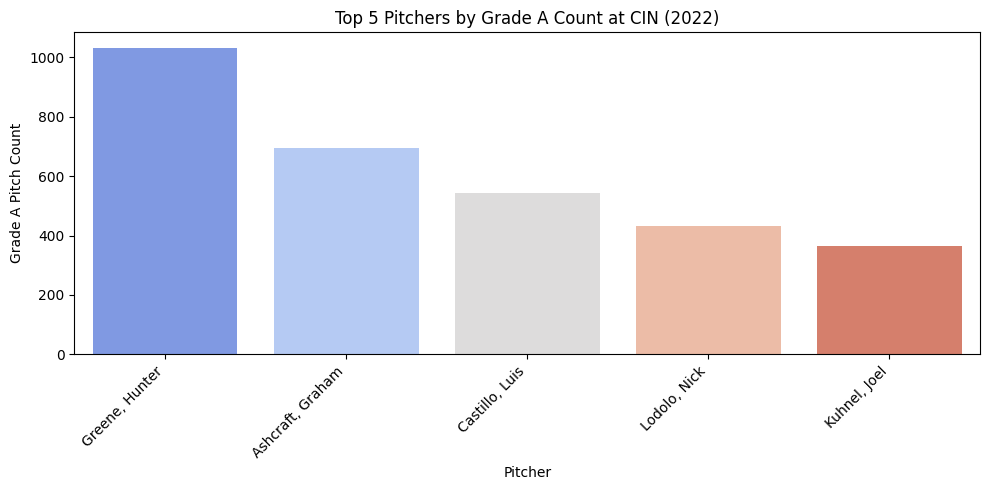

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


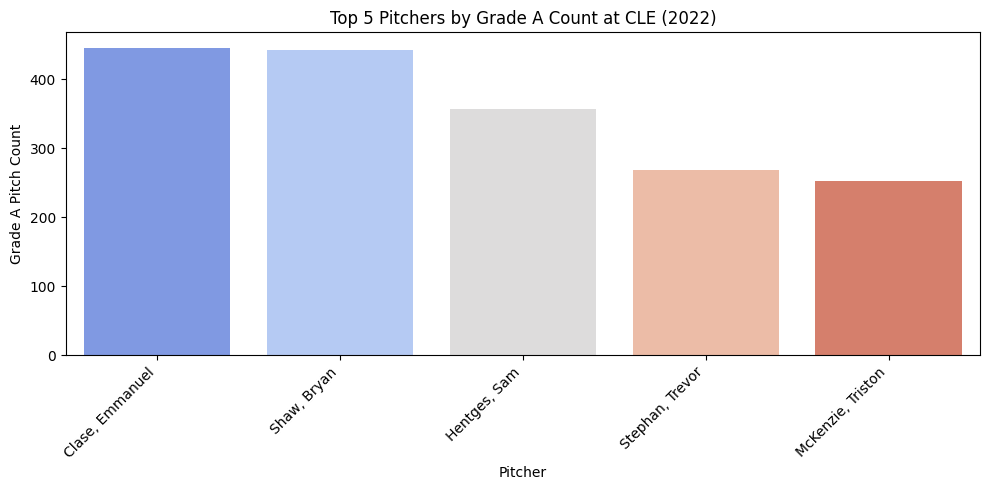

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


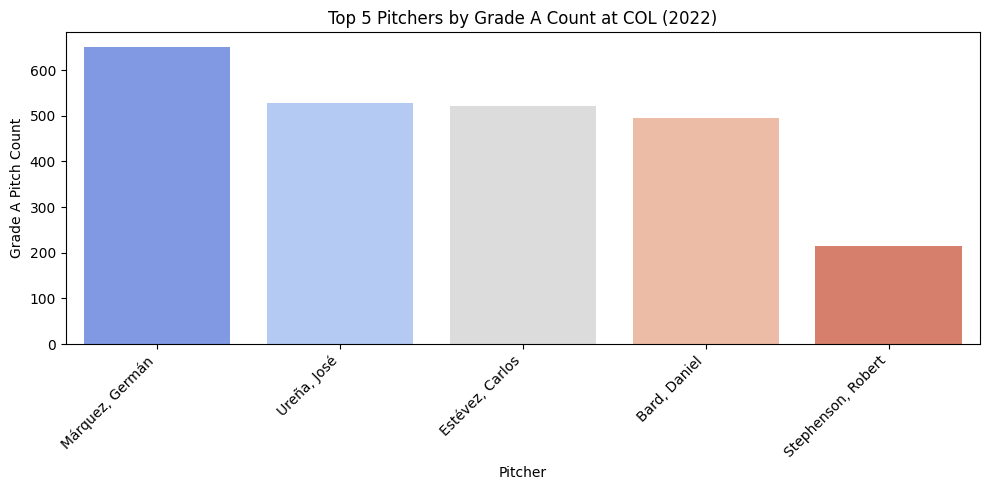

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


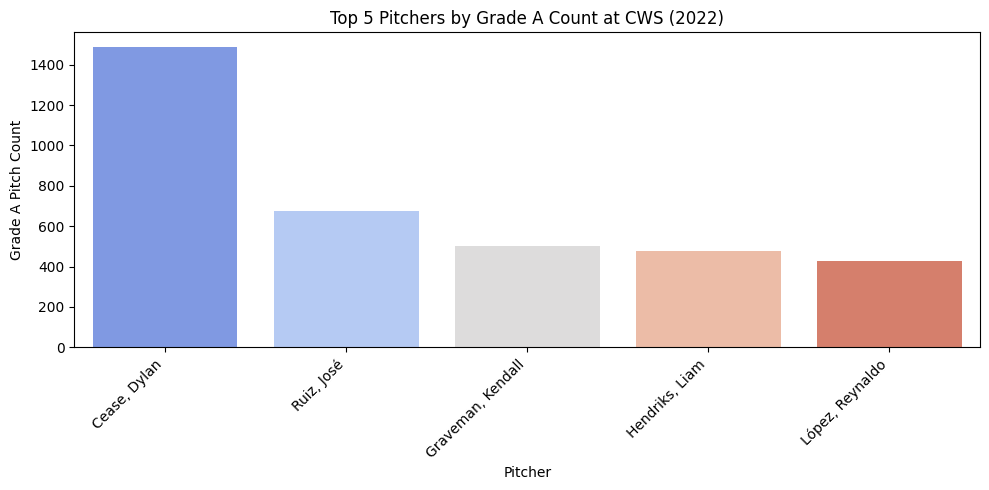

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


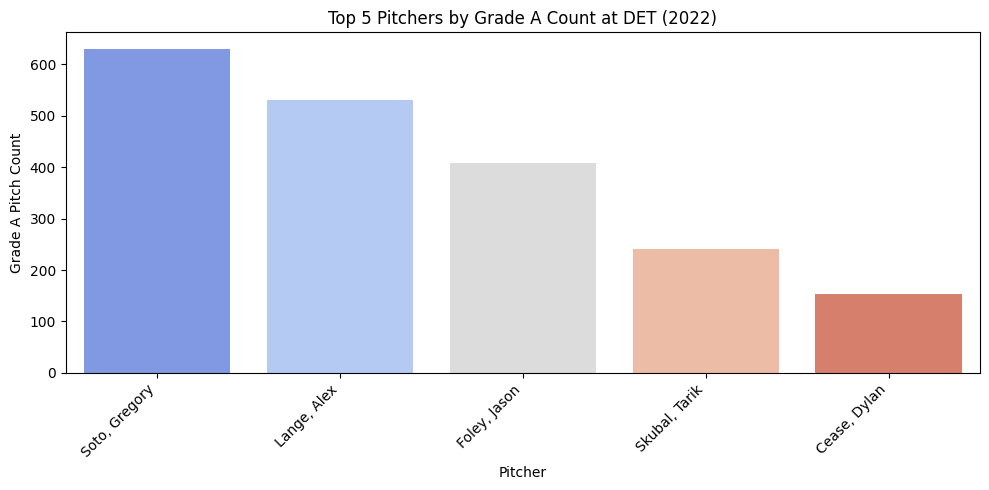

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


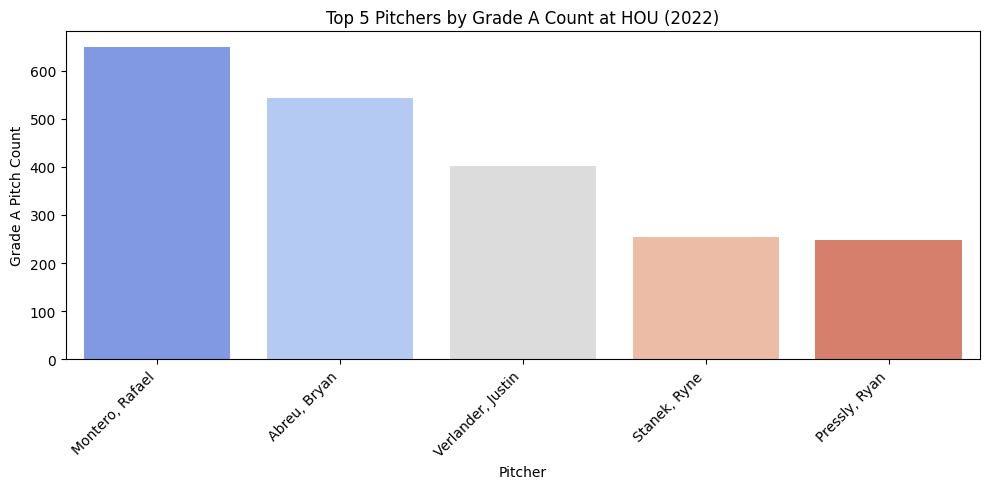

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


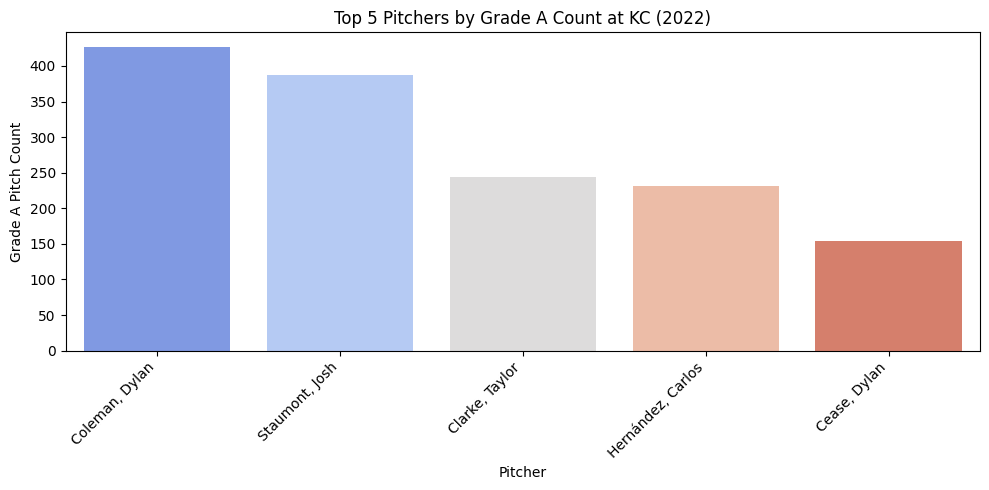

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


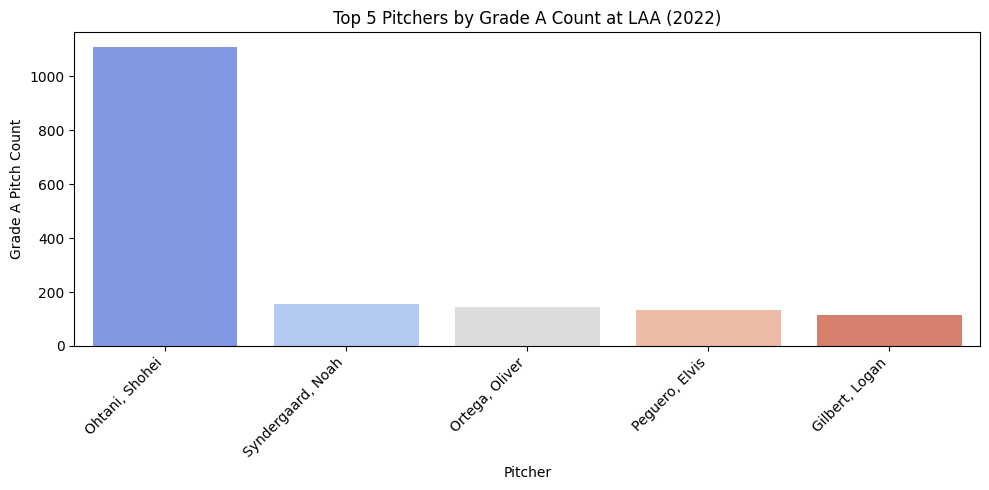

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


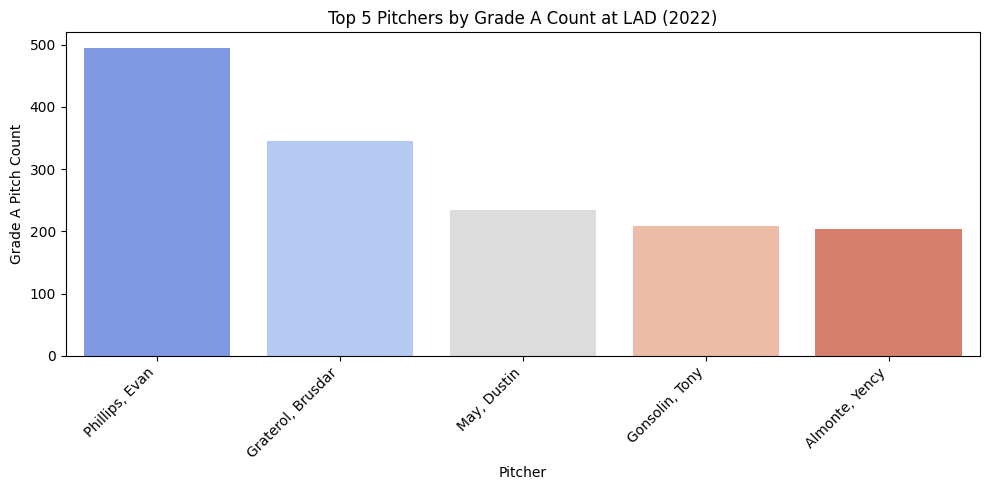

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


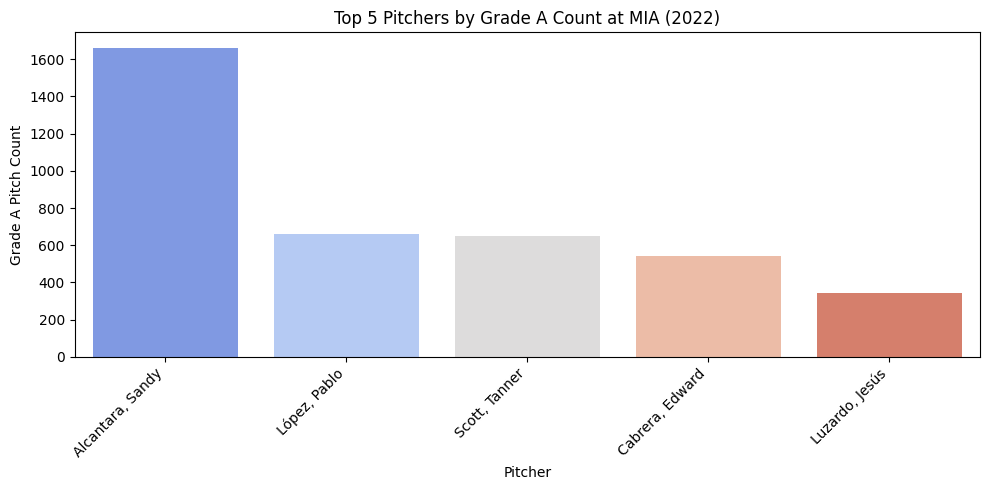

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


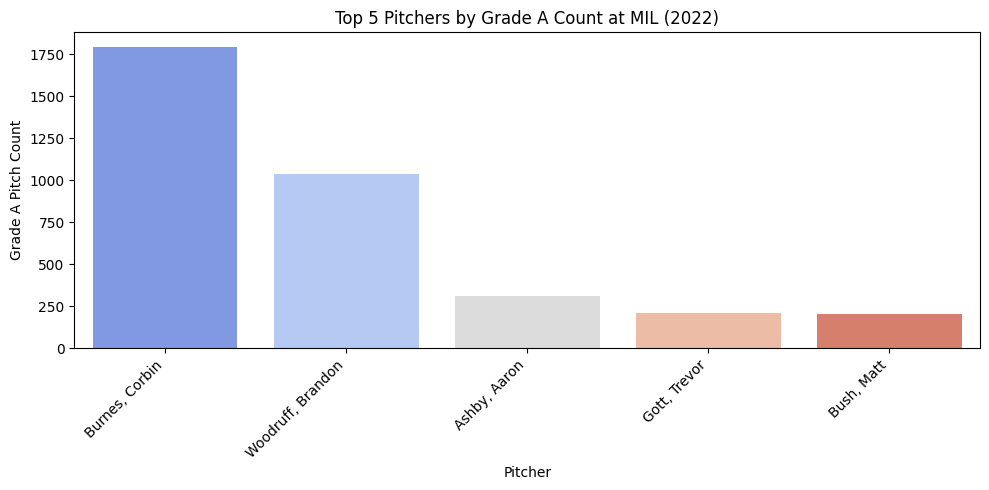

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


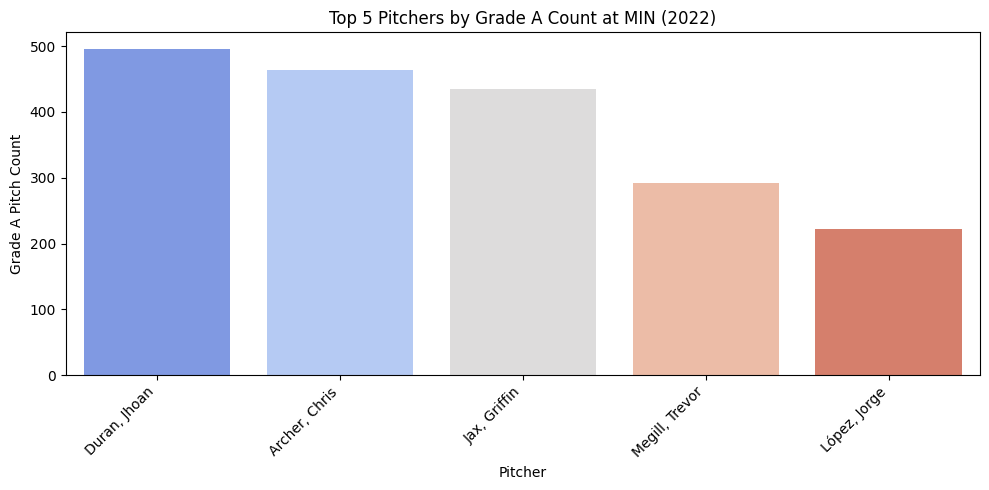

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


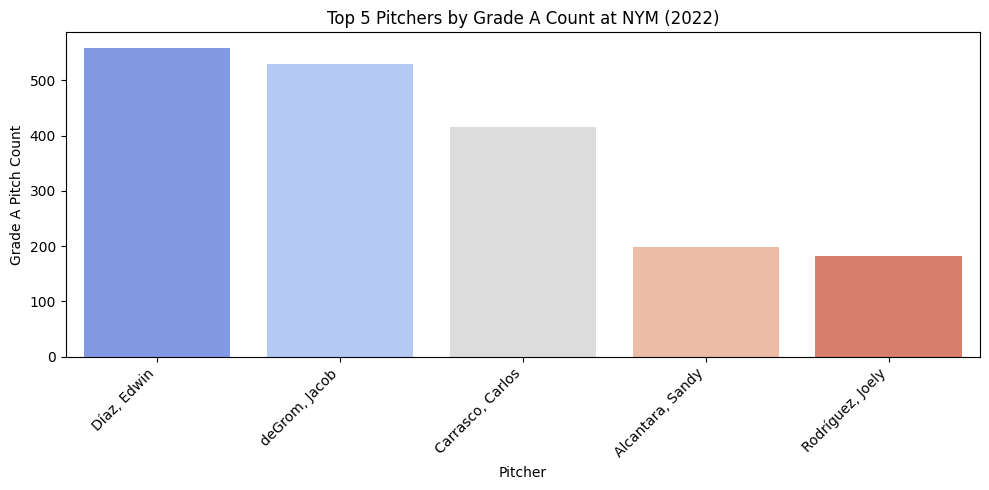

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


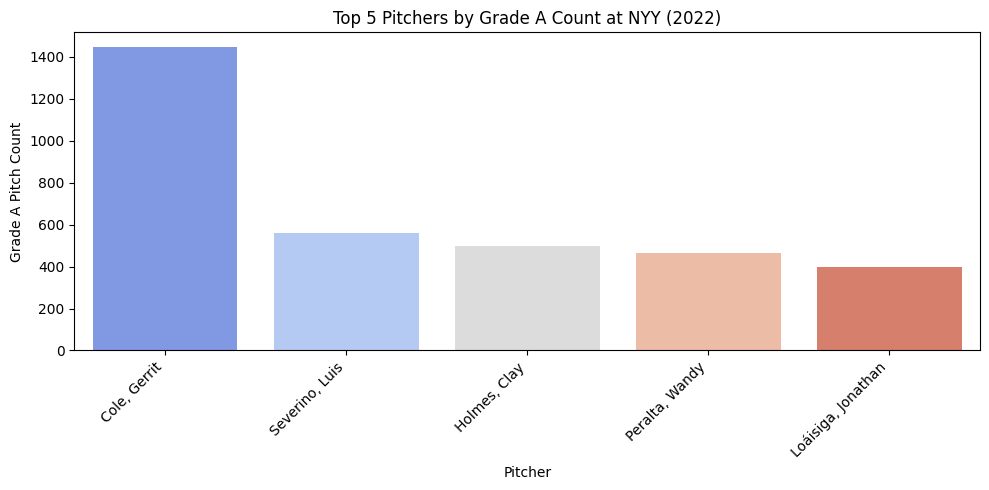

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


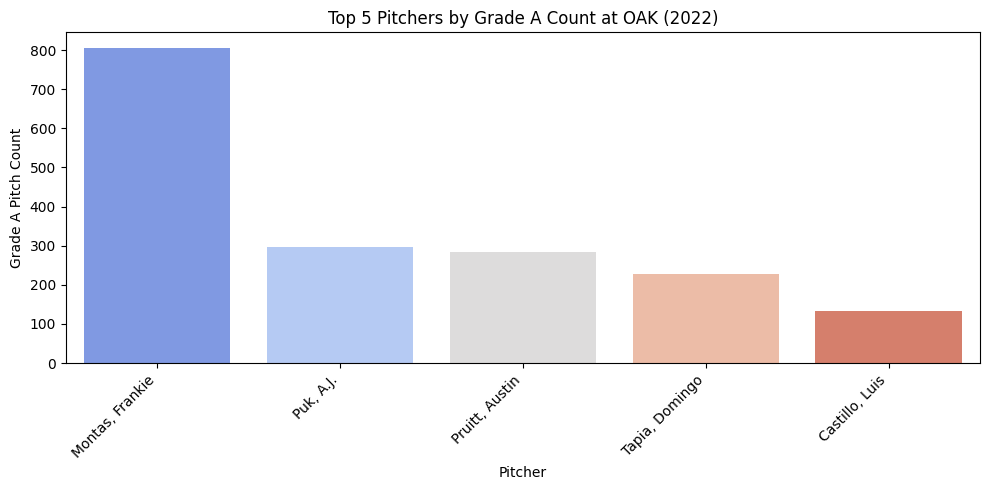

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


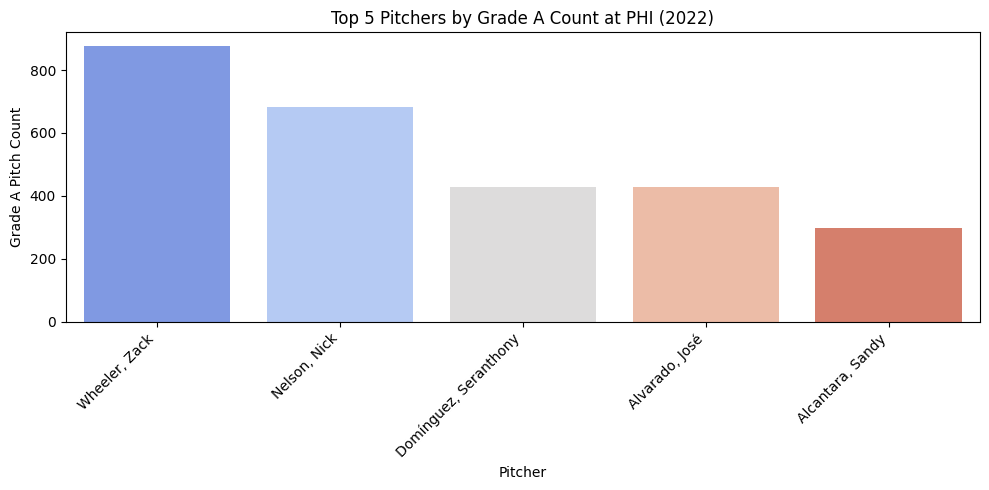

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


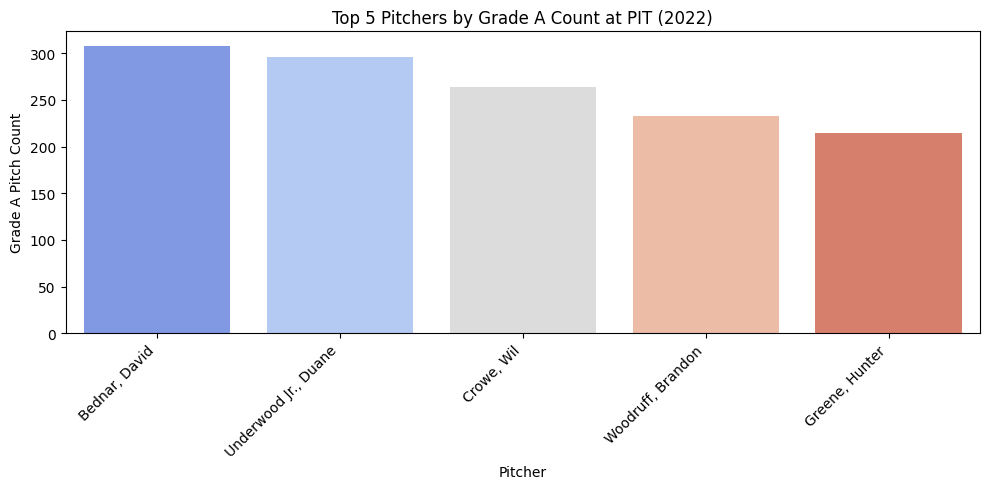

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


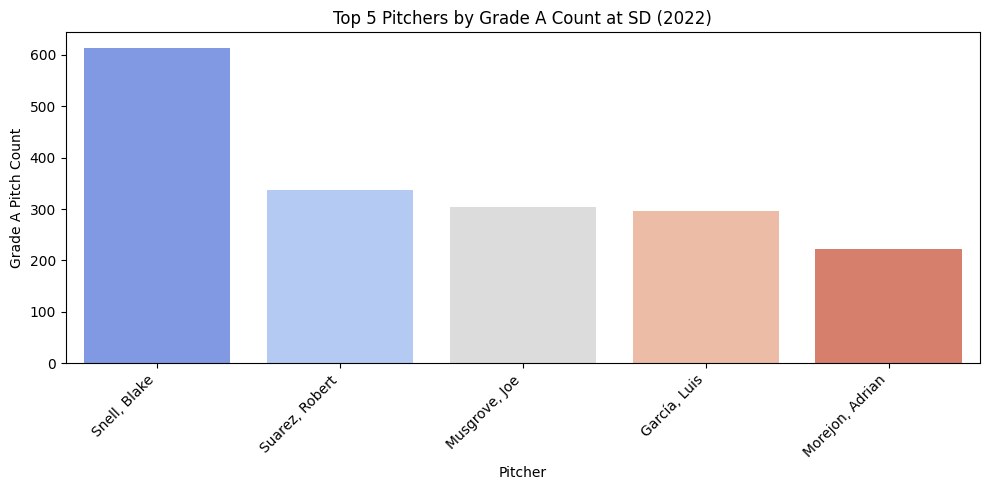

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


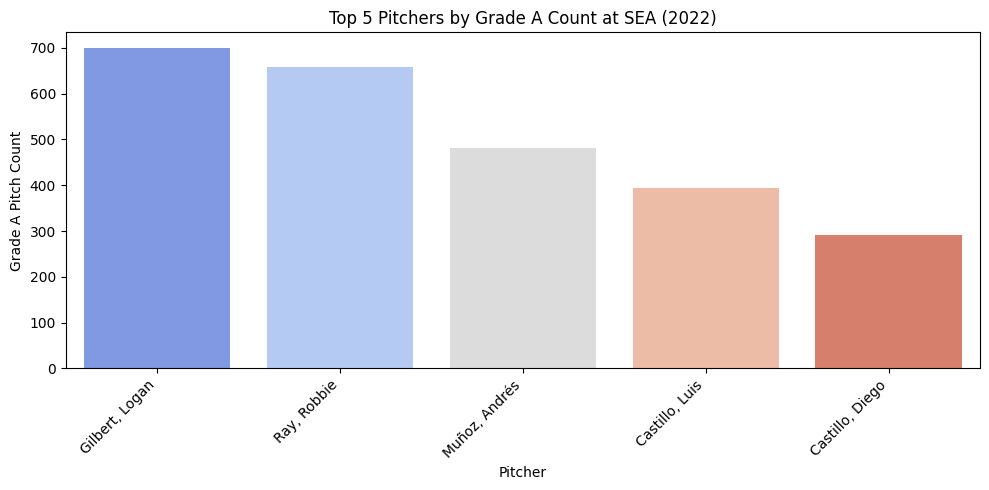

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


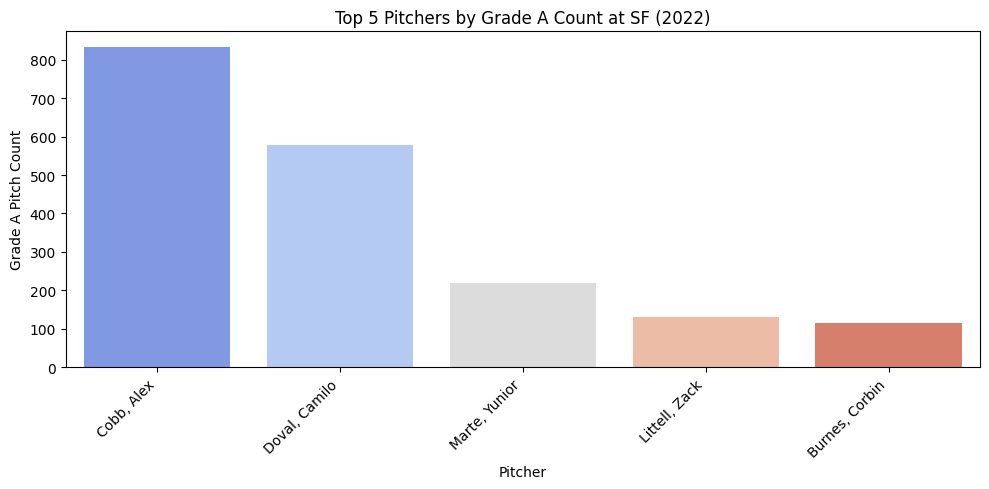

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


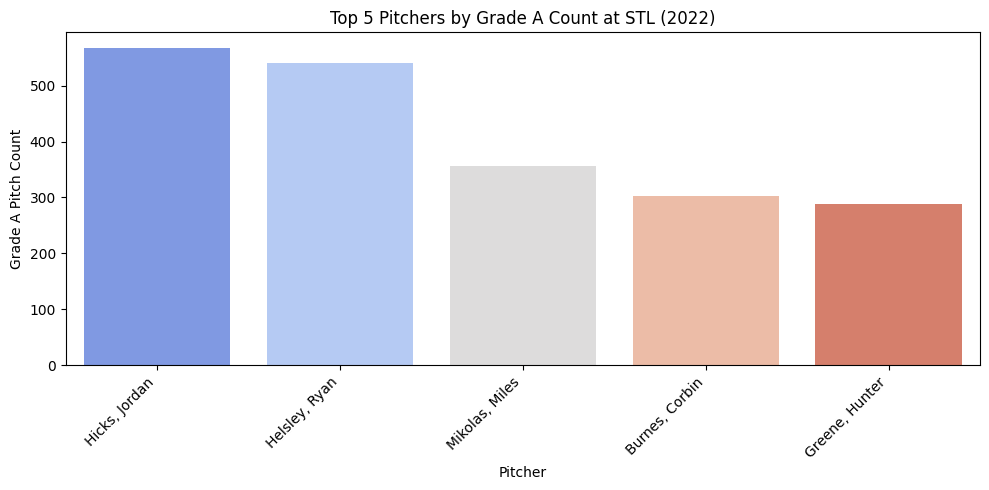

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


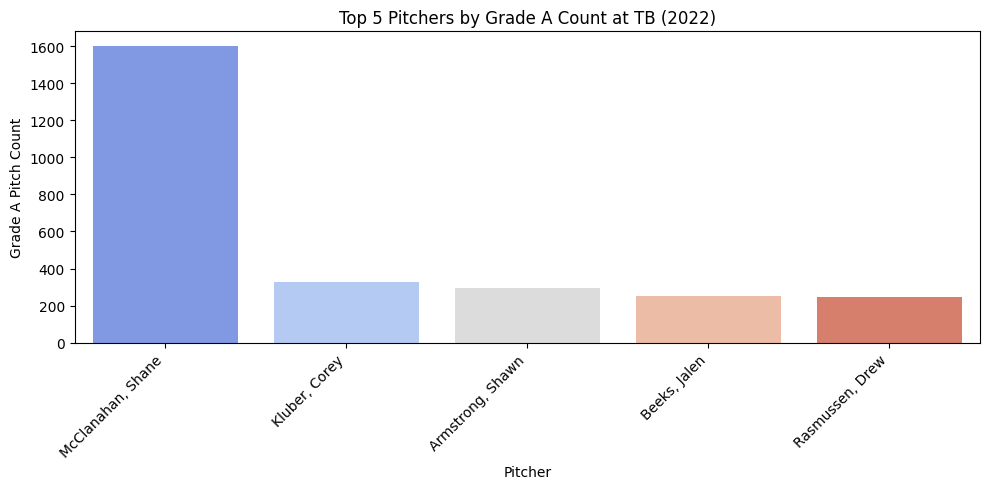

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


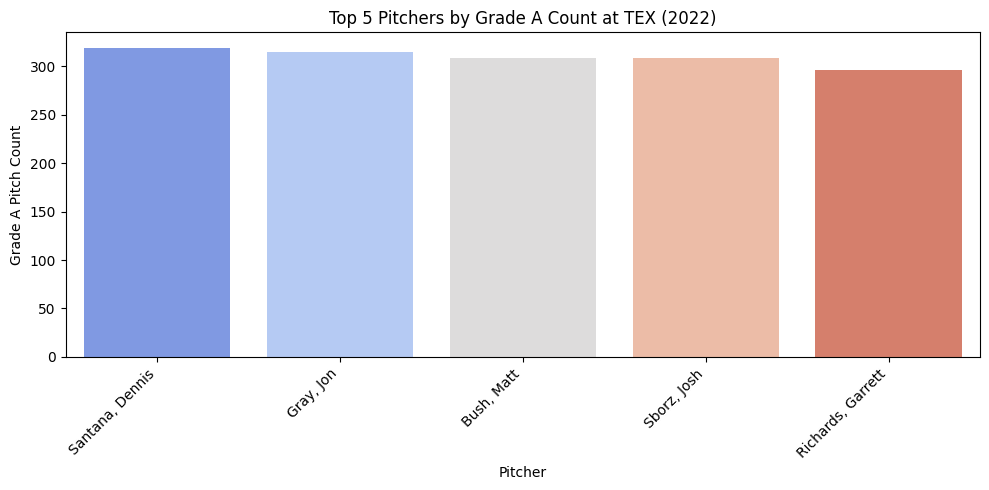

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


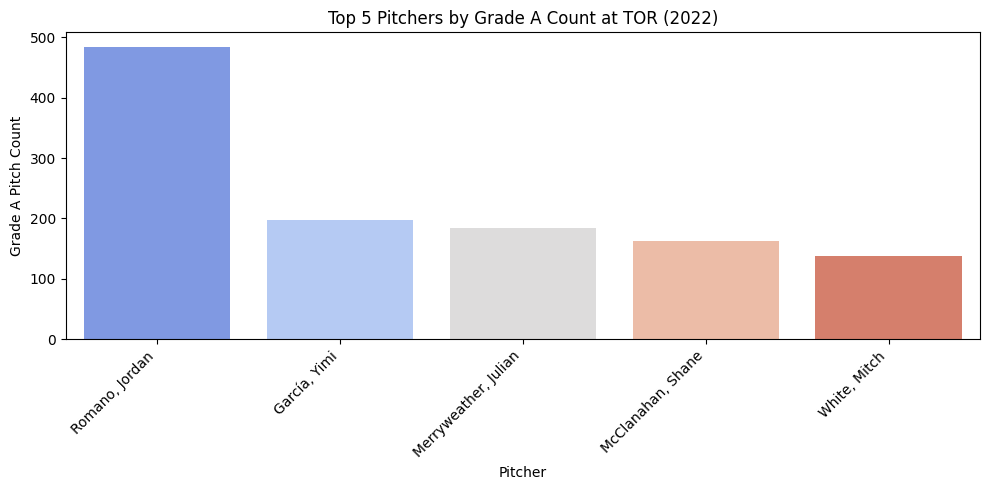

C:\Users\belgr\AppData\Local\Temp\ipykernel_47816\2143636040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')


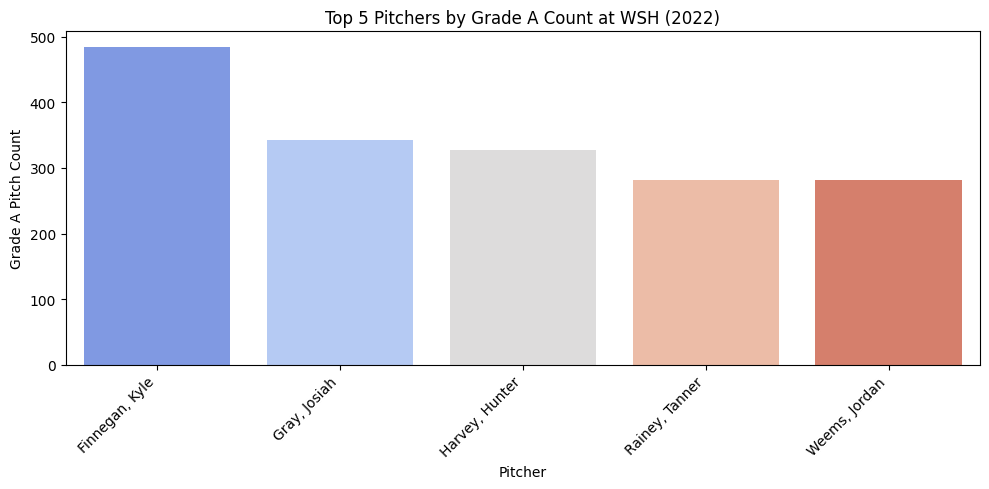

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load top pitchers by stadium
df = pd.read_csv("../data/processed/top_pitchers_by_stadium.csv")

# 🎯 Focus on a single season (e.g., 2022)
season = 2022
df_season = df[df['season'] == season]

# 🧠 Get top 5 pitchers per stadium
top_per_stadium = df_season.groupby('stadium').head(5)

# 🎨 Plot top 5 for each stadium (looping one chart per stadium)
stadiums = top_per_stadium['stadium'].unique()

for stadium in sorted(stadiums):
    subset = top_per_stadium[top_per_stadium['stadium'] == stadium]

    plt.figure(figsize=(10, 5))
    sns.barplot(data=subset, x='player_name', y='grade_a_count', palette='coolwarm')
    plt.title(f"Top 5 Pitchers by Grade A Count at {stadium} ({season})")
    plt.ylabel("Grade A Pitch Count")
    plt.xlabel("Pitcher")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
